In [1]:
import os
import pandas

# on se crée une liste d'adresses disques contenant les vidéos
listeAdresse = ['./data/x264-1908-caire-wasm/x264-results1.csv',
 './data/x264-0408-deadline-wasm/x264-results1.csv',
 './data/x264-0308-news-wasm/x264-results1.csv',
 './data/x264-2108-forester-wasm/x264-results1.csv',
 './data/x264-0308-crowd_run-wasm/x264-results1.csv',
 './data/x264-1908-flower-wasm/x264-results1.csv',
 './data/x264-0308-mobilesif-wasm/x264-results1.csv',
 './data/x264-1908-footballcif-wasm/x264-results1.csv',
 './data/x264-2108-netflix-wasm/x264-results1.csv',
 './data/x264-1908-husky-wasm/x264-results1.csv',
 './data/x264-0608-people-wasm/x264-results1.csv',
 './data/x264-1908-bridgefar-wasm/x264-results1.csv',
 './data/x264-0308-sintel-wasm/x264-results1.csv',
 './data/x264-2108-bridgeclose-wasm/x264-results1.csv',
 './data/x264-0408-tos3k-wasm/x264-results1.csv',
 './data/x264-0208-crowd_run-bermuda-wasm/x264-results1.csv',
 './data/x264-0608-coastmp4-wasm-merged/x264-results1.csv',
 './data/x264-2108-ghotism-wasm/x264-results1.csv',
 './data/x264-0508-soccer-wasm/x264-results1.csv',
 './data/x264-0208-sintel-calda-wasm/x264-results1.csv',
 './data/x264-1908-ice-wasm/x264-results1.csv',
 './data/x264-0408-football-wasm/x264-results1.csv',
 './data/x264-1908-tennis-wasm/x264-results1.csv',
 './data/x264-1908-mobilepro-wasm/x264-results1.csv',
 './data/x264-1908-akiyo-wasm/x264-results1.csv',
 './data/x264-0608-park-wasm/x264-results1.csv',
 './data/x264-0608-blue-wasm/x264-results1.csv',
 './data/x264-1908-riverbed-wasm/x264-results1.csv',
 './data/x264-0608-tractor-wasm/x264-results1.csv',
 './data/x264-1908-football15-wasm/x264-results1.csv',
 './data/x264-1908-sunflowers-wasm/x264-results1.csv',
 './data/x264-0308-ducks-wasm/x264-results1.csv',
 './data/x264-1908-waterfall-wasm/x264-results1.csv',
 './data/x264-1908-students-wasm/x264-results1.csv']

#on crée ensuite la liste des données sur chacune des vidéos
listeVideo = []

for adresse in listeAdresse:
    listeVideo.append(pandas.read_csv(open(adresse,"r")))

# on teste l'affichage des données de la première vidéo
listeVideo[0][0:5]


,configurationID,H264,no_8x8dct,no_asm,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb,rc_lookahead,ref,size,usertime,systemtime,elapsedtime
0,1,True,True,False,False,True,True,False,True,True,20,9,78801,1.336,0.068,0.695
1,10,True,True,False,True,False,True,False,False,True,40,9,86351,1.588,0.064,0.603
2,100,True,True,False,False,True,False,True,True,False,40,1,90758,0.928,0.036,0.284
3,1000,True,True,False,True,False,True,True,True,False,40,9,98511,1.348,0.020,0.415
4,1001,True,False,False,False,True,False,False,True,False,60,5,85191,1.072,0.044,0.362


In [3]:
# Learning simple à partir de random forest sur le temps
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas

r2_learning_simple = []
for aux in listeVideo:
    X=aux[['H264','no_8x8dct','no_asm','no_cabac','no_deblock','no_fast_pskip','no_mbtree','no_mixed_refs','no_weightb','rc_lookahead','ref','usertime','systemtime']]
    #X=aux[['no_mbtree','no_mixed_refs','ref']]
    Y=aux[['elapsedtime']]
    y=np.ravel(Y)
    x=np.asarray(X)

    r2=[]
    for i in [1,2,5,10,20,50,65]:
        pct_test=1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_learning_simple.append(r2)

# Pour chaque vidéo, on regarde le r2 avec une taille d'échantillon différent.
pandas.DataFrame(data=r2_learning_simple,columns=('98.6% test','97.2% test','93.0% test','86.1% test','72.2% test','30.6% test','9.7% test'))

,98.6% test,97.2% test,93.0% test,86.1% test,72.2% test,30.6% test,9.7% test
0,0.817037,0.928838,0.950546,0.952263,0.964748,0.972460,0.979723
1,0.899699,0.913565,0.954284,0.973723,0.981410,0.994309,0.995498
2,0.906062,0.976613,0.991103,0.995460,0.997477,0.997709,0.998838
3,0.835200,0.971052,0.989687,0.995724,0.998002,0.998587,0.998727
4,0.851897,0.967556,0.992684,0.996263,0.997543,0.998734,0.999117
5,0.680273,0.790343,0.887040,0.937417,0.953661,0.969822,0.981337
6,0.864634,0.902121,0.941360,0.979117,0.991672,0.996550,0.997390
7,0.887452,0.919826,0.949545,0.971989,0.982380,0.989151,0.994768
8,0.947243,0.959268,0.986053,0.992389,0.995900,0.998346,0.998899
9,0.896450,0.908037,0.961792,0.977370,0.981417,0.987622,0.992085


In [5]:
# Learning simple à partir de random forest sur la taille
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas

r2_learning_simple = []
for aux in listeVideo:
    X=aux[['H264','no_8x8dct','no_asm','no_cabac','no_deblock','no_fast_pskip','no_mbtree','no_mixed_refs','no_weightb','rc_lookahead','ref','usertime','systemtime']]
    Y=aux[['size']]
    y=np.ravel(Y)
    x=np.asarray(X)

    r2=[]
    for i in [1,2,5,10,20,50,65]:
        pct_test=1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_learning_simple.append(r2)

# Pour chaque vidéo, on regarde le r2 avec une taille d'échantillon différent.
pandas.DataFrame(data=r2_learning_simple,columns=('98.6% test','97.2% test','93.0% test','86.1% test','72.2% test','30.6% test','9.7% test'))

,98.6% test,97.2% test,93.0% test,86.1% test,72.2% test,30.6% test,9.7% test
0,0.815179,0.916110,0.964616,0.979572,0.987439,0.993625,0.995498
1,0.062657,0.792841,0.904413,0.958468,0.977780,0.996984,0.993947
2,0.853251,0.999013,0.999616,0.999733,0.999895,0.999977,0.999985
3,0.674565,0.918623,0.989210,0.995824,0.997920,0.999794,0.999946
4,0.952636,0.992768,0.997671,0.998789,0.999429,0.999933,0.999984
5,0.896705,0.973834,0.989195,0.994840,0.997725,0.999406,0.999808
6,0.794408,0.880370,0.976256,0.995168,0.997569,0.999345,0.999959
7,0.977224,0.987334,0.998118,0.999040,0.999402,0.999863,0.999927
8,0.673305,0.943058,0.990030,0.995458,0.997457,0.999131,0.999664
9,0.978249,0.990148,0.997116,0.999728,0.999918,0.999973,0.999996


In [4]:
# Tracer évolution r2 des modèles selon taille échantillon avec learning simple à partir de random forest sur le temps
# Learning simple à partir de random forest sur la taille
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas
from matplotlib import pyplot as plt

source = listeVideo[1]

r2_learning_double = []
for aux in listeVideo:
    x1 = np.asarray(source[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime','elapsedtime']])
    x2 = np.asarray(aux[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime']])
    
    y1 = np.ravel(source['elapsedtime'])
    y2 = np.ravel(aux['elapsedtime'])

    r2 = []
    for i in range(1,15):
        pct_test = 1-16*i/len(y)
        X_train_c, X_test_c, X_train, X_test, y_train_source, y_test_source, y_train_aux, y_test_aux = train_test_split(x1, x2, y1, y2, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train_source)
        prediction_y_source = clf.predict(X_test)
        
        clf2 = RandomForestRegressor()
        clf2.fit(X_train_c, y_train_aux)
        prediction_y_aux = clf2.predict(X_test_c)
        
        r2.append(r2_score(y_test_aux, prediction_y_aux))

    r2_learning_double.append(r2)
    

r2_learning_test = []
for aux in listeVideo:
    x1 = np.asarray(source[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime','elapsedtime']])
    x2 = np.asarray(aux[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime']])
    
    y = np.ravel(aux['elapsedtime'])

    r2 = []
    for i in range(1,15):
        pct_test = 1-16*i/len(y)
        X_train_c, X_test_c, X_train, X_test, y_train_aux, y_test_aux = train_test_split(x1, x2, y, test_size=pct_test, random_state=42)
        
        # Transfert function : prediction of y train of the aimed video with x train of the sourced video
        clf = RandomForestRegressor()
        clf.fit(X_train_c, y_train_aux)
        prediction_ytrain_aux = clf.predict(X_train_c)
        
        # Machine learning to explain y train from x train -> prediction of y_test from x_test
        clf2 = RandomForestRegressor()
        clf2.fit(X_train, prediction_ytrain_aux)
        prediction_y_aux = clf2.predict(X_test)
        
        r2.append(r2_score(y_test_aux, prediction_y_aux))

    r2_learning_test.append(r2)

    

r2_learning_simple = []
for aux in listeVideo:

    x = np.asarray(source[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime','elapsedtime']])
    
    y = np.ravel(aux['elapsedtime'])

    r2 = []
    for i in range(1,15):
        pct_test = 1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_learning_simple.append(r2)

# Pour chaque vidéo, on regarde le r2 avec une taille d'échantillon différent.
data_simple=pandas.DataFrame(data=r2_learning_simple)
data_double=pandas.DataFrame(data=r2_learning_double)
data_test=pandas.DataFrame(data=r2_learning_test)

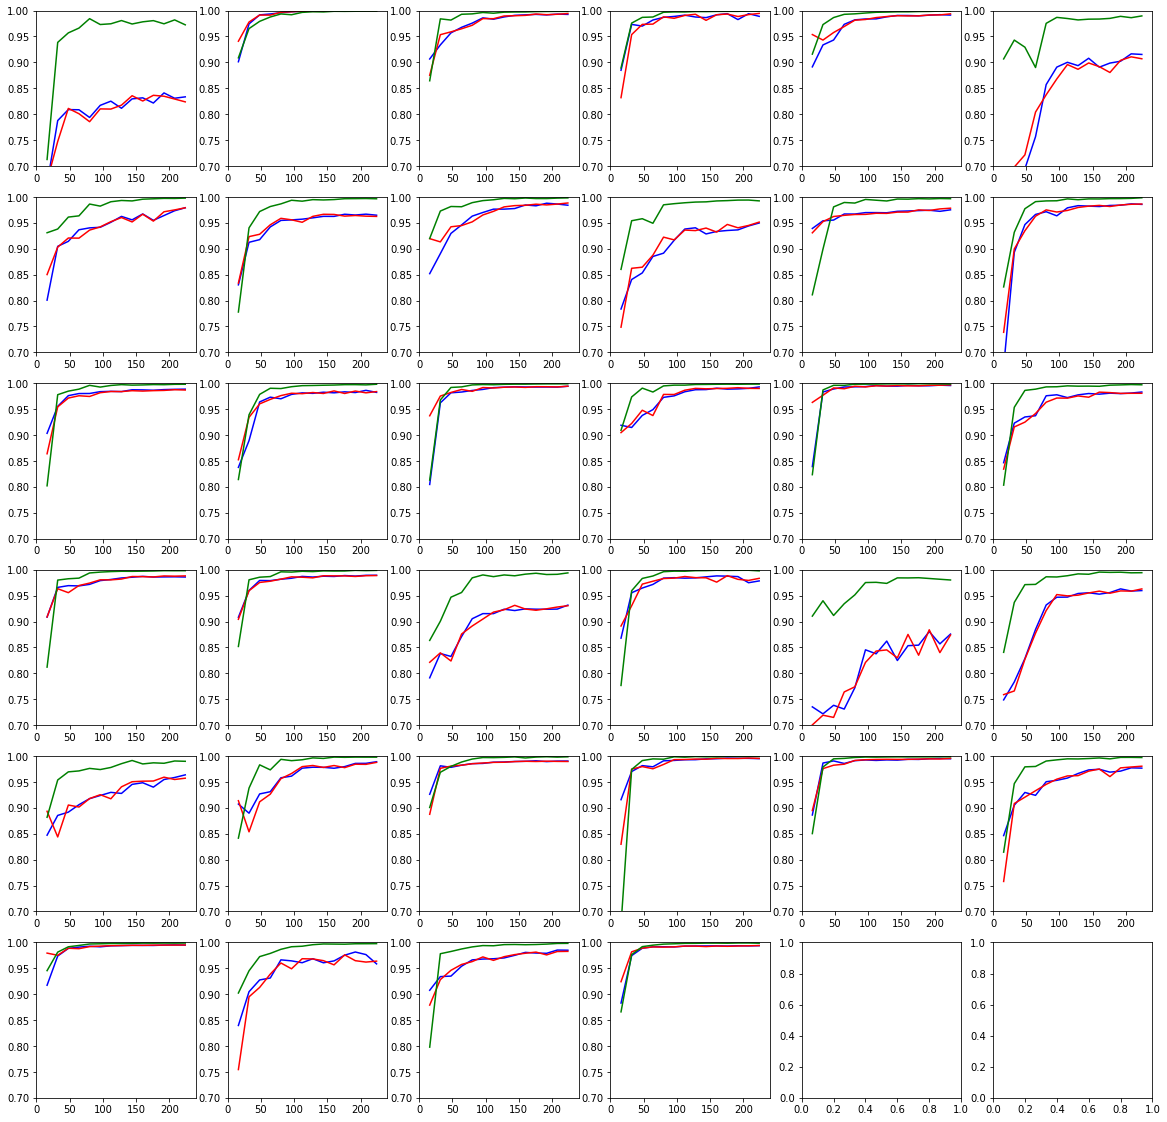

In [5]:
import numpy as np
from matplotlib import pyplot as plt

taille = 6
plt.subplots(nrows=taille,ncols=taille,figsize=(20, 20))

for i in range(taille):
    for j in range(taille):
        plt.subplot(taille,taille,taille*i+j+1)
        x1=np.asarray(data_simple[taille*i+j:taille*i+j+1])
        x2=np.asarray(data_double[taille*i+j:taille*i+j+1])
        x3=np.asarray(data_test[taille*i+j:taille*i+j+1])
        if taille*i+j<34:
            plt.axis([0,240,0.7,1])
            plt.plot(range(16,240,16),x1[0],c="blue")
            plt.plot(range(16,240,16),x2[0],c="red")
            plt.plot(range(16,240,16),x3[0],c="green")
plt.show()

In [6]:
# Tracer évolution r2 des modèles selon taille échantillon avec learning simple à partir de random forest sur le temps
# Learning simple à partir de random forest sur la taille
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas
from matplotlib import pyplot as plt

# groupes CAH : 5/22/23/31/9/20/6/29/7/32
# 0/11/2/24/14/17
groupe2=[0,2,11,14,17,24]

source = listeVideo[0]

moy_r2=[]

r2_learning_double = []
indice=0
for aux in listeVideo:
    if indice in groupe2 :
        indice2=0
        for aux2 in listeVideo:
            if indice2 in groupe2:

                x = np.asarray(source[['elapsedtime','H264','no_8x8dct','no_asm',
                                       'no_cabac','no_deblock','no_fast_pskip',
                                       'no_mbtree','no_mixed_refs','no_weightb',
                                       'rc_lookahead','ref','usertime','systemtime']])
                y = np.ravel(aux['elapsedtime'])

                
                pct_test = 1-16*6/len(y)
                X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
                clf = RandomForestRegressor()
                clf.fit(X_train, y_train)
                prediction = clf.predict(X_test)
                r2.append(r2_score(y_test, prediction))

                r2_learning_double.append(r2)
    indice=indice+1

    
data_double=pandas.DataFrame(data=r2_learning_double)

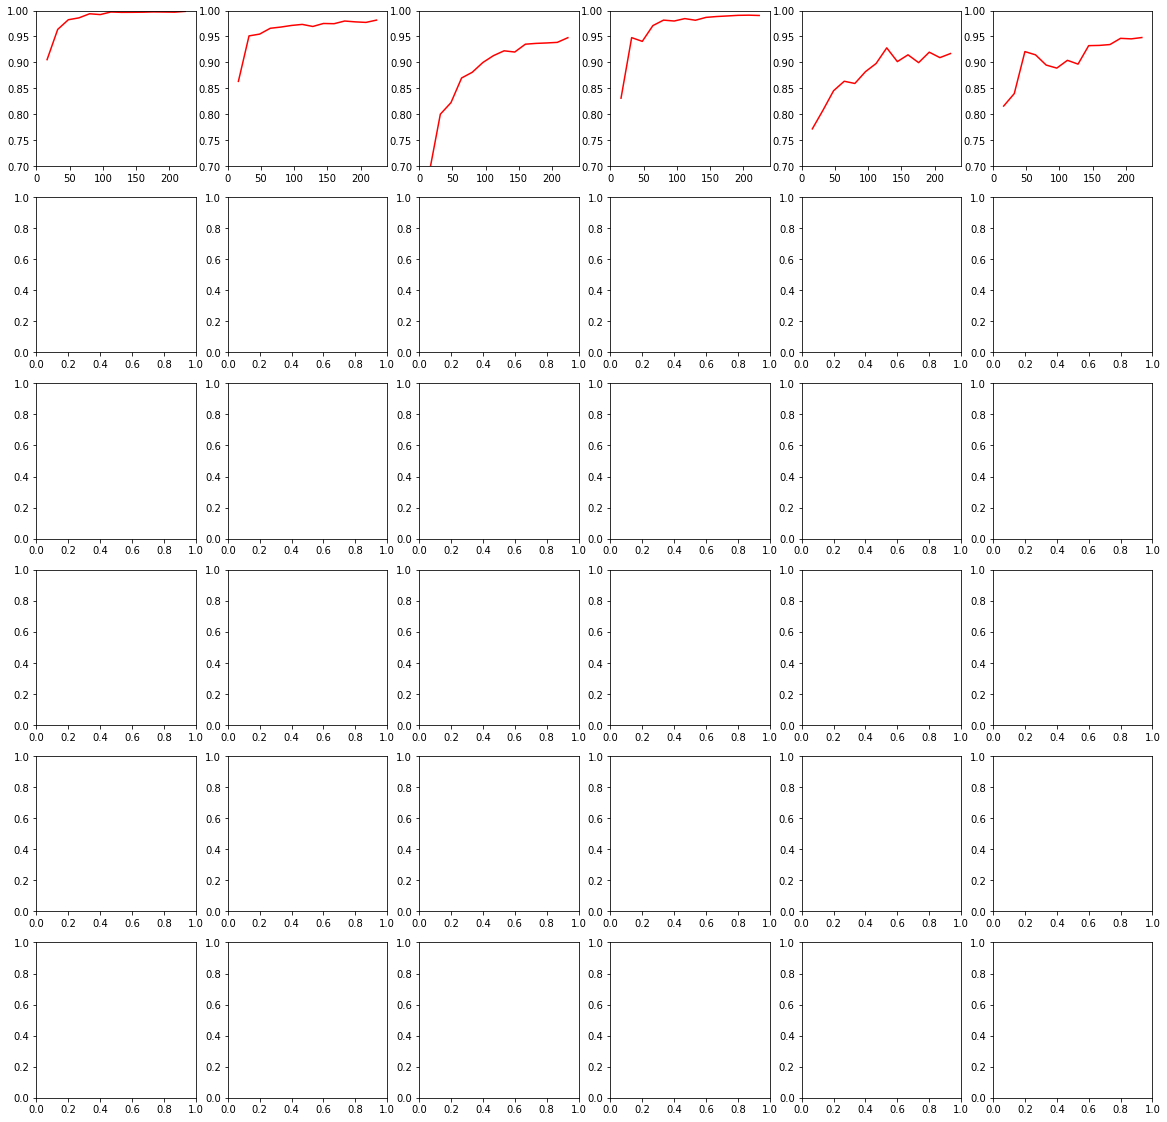

In [37]:
import numpy as np
from matplotlib import pyplot as plt

taille = 6
plt.subplots(nrows=taille,ncols=taille,figsize=(20, 20))

for i in range(taille):
    for j in range(taille):
        plt.subplot(taille,taille,taille*i+j+1)
        x2=np.asarray(data_double[taille*i+j:taille*i+j+1])
        if taille*i+j<6:
            plt.axis([0,240,0.7,1])
            plt.plot(range(16,240,16),x2[0],c="red")
plt.show()

In [2]:
# Tracer évolution r2 des modèles selon taille échantillon avec learning simple à partir de random forest sur le temps
# Learning simple à partir de random forest sur la taille
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas
from matplotlib import pyplot as plt

source = listeVideo[3]

r2_learning_test = []
for aux in listeVideo:
    x1 = np.asarray(source[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime','elapsedtime']])
    x2 = np.asarray(aux[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime']])
    
    y = np.ravel(aux['elapsedtime'])

    r2 = []
    for i in range(1,7):
        pct_test = 1-16*i/len(y)
        X_train_c, X_test_c, X_train, X_test, y_train_aux, y_test_aux = train_test_split(x1, x2, y, test_size=pct_test, random_state=42)
        
        # Transfert function : prediction of y train of the aimed video with x train of the sourced video
        clf = RandomForestRegressor()
        clf.fit(X_train_c, y_train_aux)
        prediction_ytrain_aux = clf.predict(X_train_c)
        
        # Machine learning to explain y train from x train -> prediction of y_test from x_test
        clf2 = RandomForestRegressor()
        clf2.fit(X_train, prediction_ytrain_aux)
        prediction_y_aux = clf2.predict(X_test)
        
        r2.append(r2_score(y_test_aux, prediction_y_aux))

    r2_learning_test.append(r2)

r2_learning_simple = []
for aux in listeVideo:
    X=aux[['H264','no_8x8dct','no_asm','no_cabac','no_deblock','no_fast_pskip','no_mbtree','no_mixed_refs','no_weightb','rc_lookahead','ref','usertime','systemtime']]
    Y=aux[['elapsedtime']]
    y=np.ravel(Y)
    x=np.asarray(X)

    r2=[]
    for i in range(1,7):
        pct_test=1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_learning_simple.append(r2)

# Pour chaque vidéo, on regarde le r2 avec une taille d'échantillon différent.
data_simple=pandas.DataFrame(data=r2_learning_simple)

# Pour chaque vidéo, on regarde le r2 avec une taille d'échantillon différent.
data_test=pandas.DataFrame(data=r2_learning_test)

In [3]:
import pandas as pd

#on crée une bdd avec toutes les configurations
vid = listeVideo[0].drop(['configurationID','H264','size','usertime','systemtime','elapsedtime'],axis=1)

# puis on y ajoute toutes les tailles et tous les temps de vidéos
for i in range(len(listeVideo)):
    labTemps = 'temps_'+str(i+1)
    vid[labTemps] = listeVideo[i]['elapsedtime']

r2_full_temps = []
for indice in range(len(listeVideo)):
    
    x = pd.DataFrame(vid.drop('temps_'+str(i),axis=1))
    y = np.ravel(vid['temps_'+str(i)])

    r2 = []
    for i in range(1,7):
        pct_test = 1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_full_temps.append(r2)
    
data_full_temps = pandas.DataFrame(data=r2_full_temps)

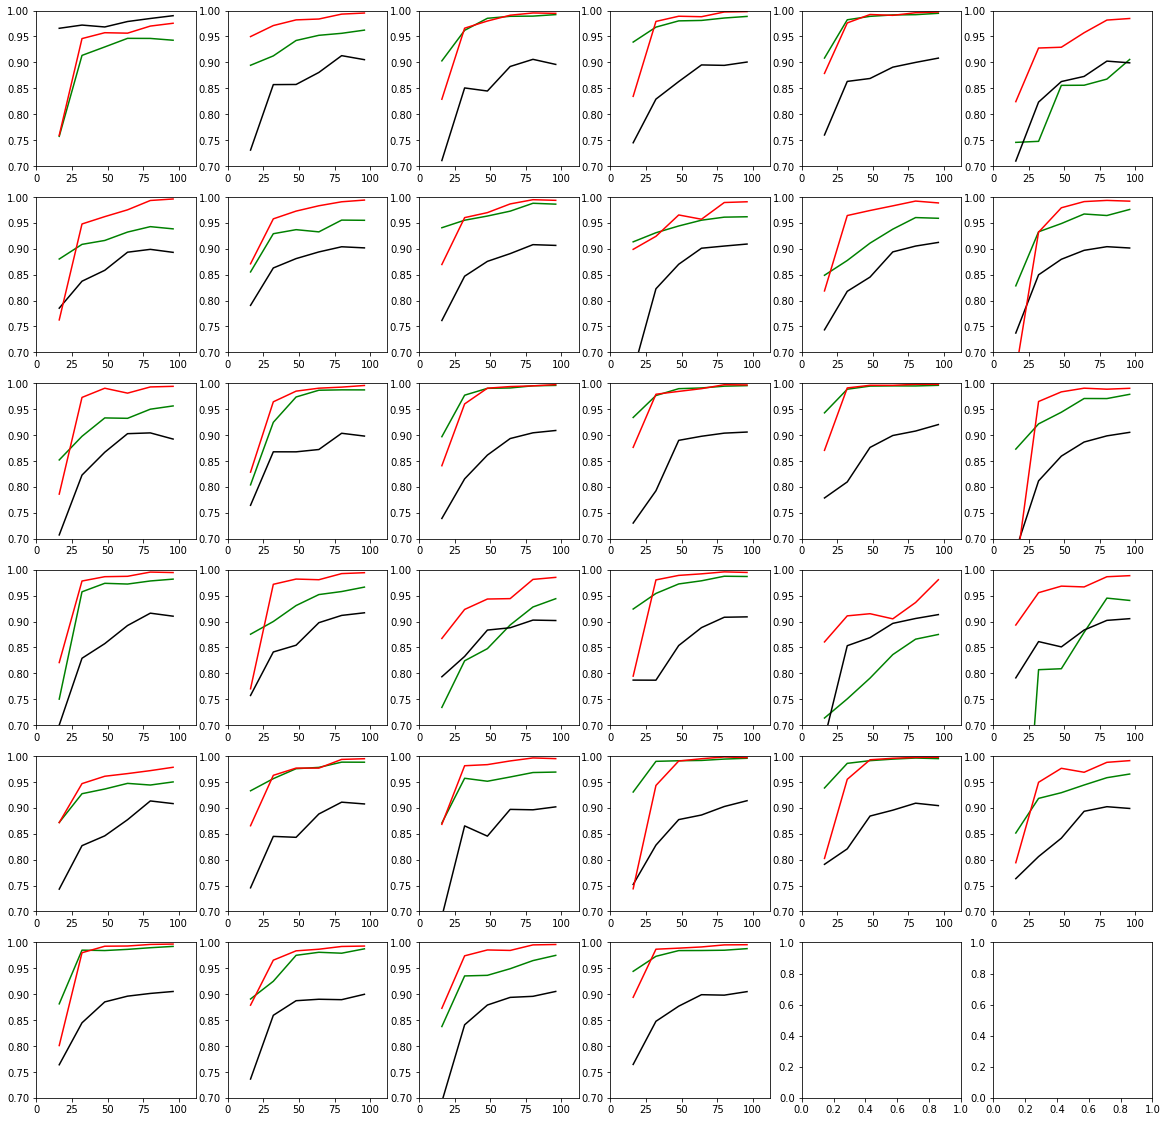

In [4]:
import numpy as np
from matplotlib import pyplot as plt

taille = 6
plt.subplots(nrows=taille,ncols=taille,figsize=(20, 20))

for i in range(taille):
    for j in range(taille):
        plt.subplot(taille,taille,taille*i+j+1)
        x1=np.asarray(data_simple[taille*i+j:taille*i+j+1])
        x2=np.asarray(data_full_temps[taille*i+j:taille*i+j+1])
        x3=np.asarray(data_test[taille*i+j:taille*i+j+1])
        if taille*i+j<34:
            plt.axis([0,112,0.7,1])
            plt.plot(range(16,112,16),x1[0],c="green")
            plt.plot(range(16,112,16),x2[0],c="black")
            plt.plot(range(16,112,16),x3[0],c="red")
plt.show()

In [5]:
print("Stat r² pour 32 config (learning simple)")
print(data_simple[1].describe())
print("")
print("Stat r² pour 32 config (transfert+learnin)")
print(data_test[1].describe())
print("")


Stat r² pour 32 config (learning simple)
count    34.000000
mean      0.925094
std       0.061600
min       0.747456
25%       0.912746
50%       0.931843
75%       0.966536
max       0.989900
Name: 1, dtype: float64

Stat r² pour 32 config (transfert+learnin)
count    34.000000
mean      0.960331
std       0.019767
min       0.910909
25%       0.948246
50%       0.964264
75%       0.975707
max       0.991153
Name: 1, dtype: float64



In [8]:
print("En moyenne, pour 32 config, le r²_transfert au r²_learning_simple de :")
sum((data_test[1]-data_simple[1]))/34

En moyenne, pour 32 config, le r²_transfert au r²_learning_simple de :


0.03523657419440216